In [1]:
import numpy as np
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import MaxPool2D, Dense, Flatten, Dropout, Conv2D
import tensorflow as tf 

In [4]:
from sklearn.model_selection import GridSearchCV

In [5]:
print(tf.__version__)

2.3.1


In [6]:
numSubWins = 11
trainingDir = '../../Dataset/training/'
testingDir = '../../Dataset/testing/'

In [7]:
def generate_data():
    hard = np.loadtxt(trainingDir+"hard.fvec",skiprows=1)
    nDims = int(hard.shape[1] / numSubWins)
    h1 = np.reshape(hard,(hard.shape[0],nDims,numSubWins))
    neut = np.loadtxt(trainingDir+"neut.fvec",skiprows=1)
    n1 = np.reshape(neut,(neut.shape[0],nDims,numSubWins))
    soft = np.loadtxt(trainingDir+"soft.fvec",skiprows=1)
    s1 = np.reshape(soft,(soft.shape[0],nDims,numSubWins))
    lsoft = np.loadtxt(trainingDir+"linkedSoft.fvec",skiprows=1)
    ls1 = np.reshape(lsoft,(lsoft.shape[0], nDims, numSubWins))
    lhard = np.loadtxt(trainingDir+"linkedHard.fvec",skiprows=1)
    lh1 = np.reshape(lhard,(lhard.shape[0],nDims,numSubWins))
    
    
    both=np.concatenate((h1,n1,s1,ls1,lh1))
    y=np.concatenate((np.repeat(0,len(h1)),np.repeat(1,len(n1)), np.repeat(2,len(s1)), np.repeat(3,len(ls1)), np.repeat(4,len(lh1))))
    
    
    both = both.reshape(both.shape[0],nDims,numSubWins,1)
    if (trainingDir==testingDir):
        X_train, X_test, y_train, y_test = train_test_split(both, y, test_size=0.2)
    else:
        X_train = both
        y_train = y
        #testing data
        
        hard = np.loadtxt(testingDir+"hard.fvec",skiprows=1)
        h1 = np.reshape(hard,(hard.shape[0],nDims,numSubWins))
        neut = np.loadtxt(testingDir+"neut.fvec",skiprows=1)
        n1 = np.reshape(neut,(neut.shape[0],nDims,numSubWins))
        soft = np.loadtxt(testingDir+"soft.fvec",skiprows=1)
        s1 = np.reshape(soft,(soft.shape[0],nDims,numSubWins))
        lsoft = np.loadtxt(testingDir+"linkedSoft.fvec",skiprows=1)
        ls1 = np.reshape(lsoft,(lsoft.shape[0],nDims,numSubWins))
        lhard = np.loadtxt(testingDir+"linkedHard.fvec",skiprows=1)
        lh1 = np.reshape(lhard,(lhard.shape[0],nDims,numSubWins))
        
        both2=np.concatenate((h1,n1,s1,ls1,lh1))
        X_test = both2.reshape(both2.shape[0],nDims,numSubWins,1)
        y_test=np.concatenate((np.repeat(0,len(h1)),np.repeat(1,len(n1)), np.repeat(2,len(s1)), np.repeat(3,len(ls1)), np.repeat(4,len(lh1))))
    
    Y_train = np_utils.to_categorical(y_train, 5)
    Y_test = np_utils.to_categorical(y_test, 5)
    X_valid, X_test, Y_valid, Y_test = train_test_split(X_test, Y_test, test_size=0.5)        
        
    
    #print(X_train.shape)
    print("training set has %d examples" % X_train.shape[0])
    print("validation set has %d examples" % X_valid.shape[0])
    print("test set has %d examples" % X_test.shape[0])
    
    return X_train, X_valid, X_test, Y_train, Y_valid, Y_test

In [8]:
X_train, X_valid, X_test, Y_train, Y_valid, Y_test = generate_data()

training set has 10000 examples
validation set has 5000 examples
test set has 5000 examples


In [9]:
print('Shape of train dataset: {}'.format(X_train.shape))
print('Shape of train label dataset: {}'.format(Y_train.shape))

print('Shape of validation dataset: {}'.format(X_valid.shape))
print('Shape of validation label dataset: {}'.format(Y_valid.shape))

print('Shape of test dataset: {}'.format(X_test.shape))
print('Shape of test label dataset: {}'.format(Y_test.shape))

Shape of train dataset: (10000, 12, 11, 1)
Shape of train label dataset: (10000, 5)
Shape of validation dataset: (5000, 12, 11, 1)
Shape of validation label dataset: (5000, 5)
Shape of test dataset: (5000, 12, 11, 1)
Shape of test label dataset: (5000, 5)


In [10]:
input_shape = X_train[0].shape
number_of_classes = Y_train.shape[1]

In [11]:
def make_model():
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
    model.add(MaxPool2D(2,2))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(number_of_classes, activation='sigmoid'))
    
    return model

In [12]:
model = make_model()

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 10, 9, 32)         320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 7, 64)          18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 4, 3, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 4, 3, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 768)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               98432     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [14]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [15]:
batch_size = 64
epochs = 100
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_valid, Y_valid))

Epoch 1/100
157/157 [==============================] - 1s 5ms/step - loss: 1.3172 - accuracy: 0.4215 - val_loss: 1.0133 - val_accuracy: 0.5670
Epoch 2/100
157/157 [==============================] - 1s 4ms/step - loss: 0.9963 - accuracy: 0.5757 - val_loss: 0.8587 - val_accuracy: 0.6438
Epoch 3/100
157/157 [==============================] - 1s 4ms/step - loss: 0.8901 - accuracy: 0.6185 - val_loss: 0.7946 - val_accuracy: 0.6584
Epoch 4/100
157/157 [==============================] - 1s 4ms/step - loss: 0.8261 - accuracy: 0.6484 - val_loss: 0.7369 - val_accuracy: 0.6850
Epoch 5/100
157/157 [==============================] - 1s 6ms/step - loss: 0.7863 - accuracy: 0.6642 - val_loss: 0.6976 - val_accuracy: 0.7016
Epoch 6/100
157/157 [==============================] - 1s 6ms/step - loss: 0.7385 - accuracy: 0.6869 - val_loss: 0.6686 - val_accuracy: 0.7128
Epoch 7/100
157/157 [==============================] - 1s 4ms/step - loss: 0.7074 - accuracy: 0.6993 - val_loss: 0.6556 - val_accuracy: 0.7210

In [16]:
def plot_learning_curve(history, epochs):
    epoch_range = range(1, epochs+1)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc="upper left")
    plt.show()

    epoch_range = range(1, epochs+1)
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc="upper left")
    plt.show()

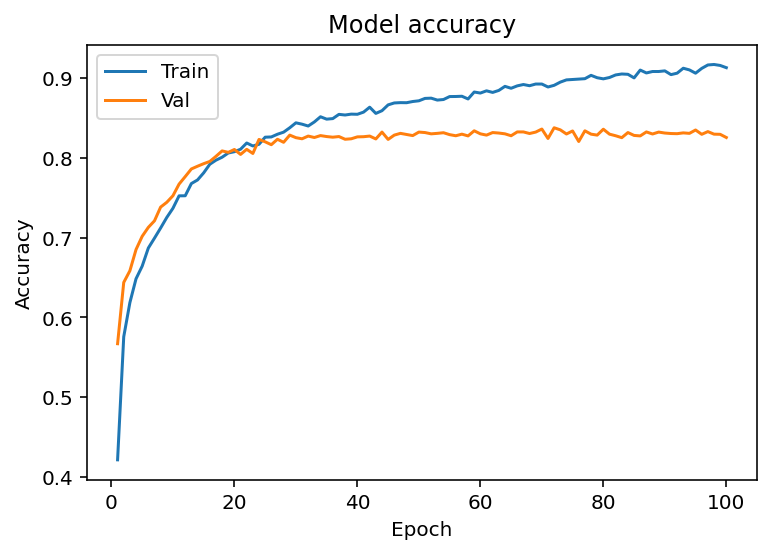

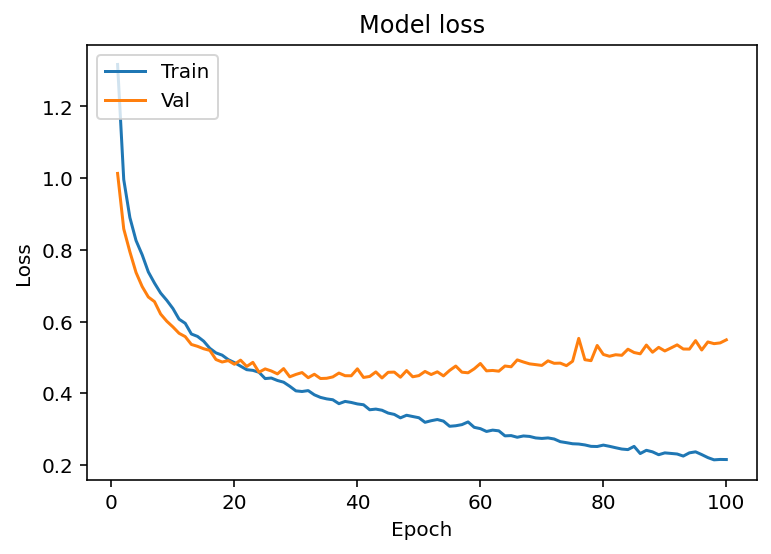

In [17]:
plot_learning_curve(history, epochs)